<a href="https://colab.research.google.com/github/Fullkopi/Sharing/blob/main/Q6_ML1_Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-10-61097115af2e>:25: UserWarning: The following kwargs were not used by contour: 'label'
  contours = ax.contour(x, y, rv.pdf(pos), levels=10, label=label, colors='tab:blue')


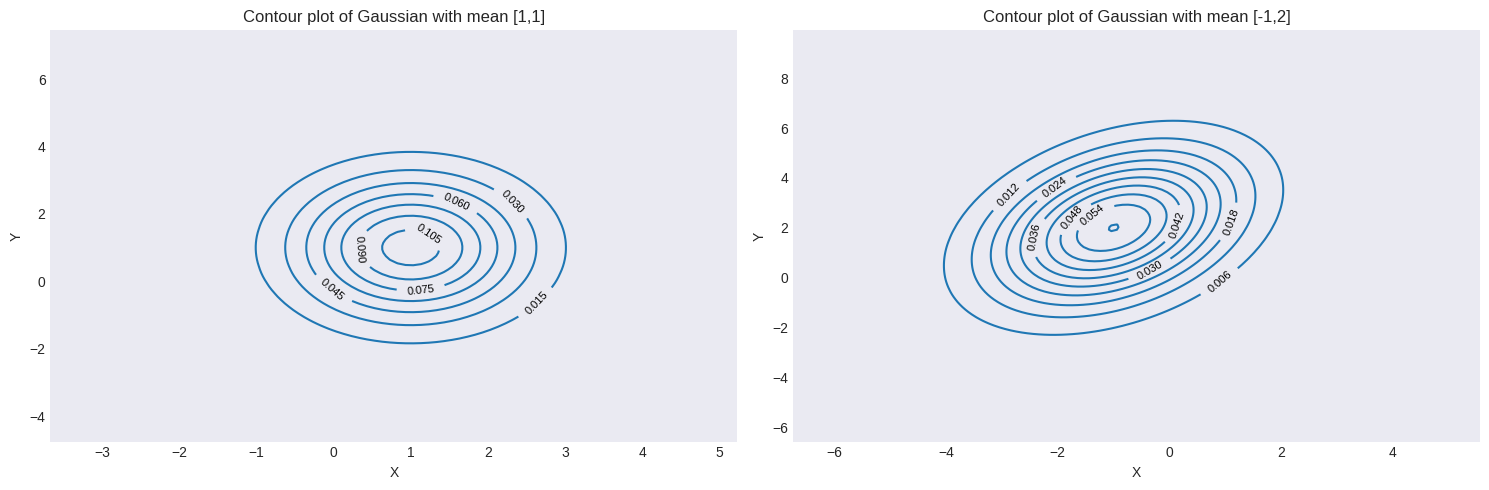

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

def plot_contour(mu, cov, label=None, ax=None):
    if ax is None:
        ax = plt.gca()

    # Generate data points
    data_points = np.random.multivariate_normal(mu, cov, 5000)
    x_min, x_max = np.min(data_points[:, 0]), np.max(data_points[:, 0])
    y_min, y_max = np.min(data_points[:, 1]), np.max(data_points[:, 1])
    delta_x, delta_y = (x_max - x_min)/10, (x_max - x_min)/10
    x_min, x_max = x_min - delta_x, x_max + delta_x
    y_min, y_max = y_min - delta_y, y_max + delta_y

    # Generate grid points
    x, y = np.mgrid[x_min:x_max:0.1, y_min:y_max:0.1]
    pos = np.dstack((x, y))

    # Create multivariate normal distribution
    rv = multivariate_normal(mu, cov)

    # Plot contour with isovalues labeled
    contours = ax.contour(x, y, rv.pdf(pos), levels=10, label=label, colors='tab:blue')
    ax.clabel(contours, inline=True, fontsize=8, colors='black')
    ax.legend()

# Define means and covariance matrices for each Gaussian
means = [(1, 1), (-1, 2)]
covs = [[[1, 0], [0, 2]], [[2, 1], [1, 4]]]
labels = ['Gaussian with mean [1,1]', 'Gaussian with mean [-1,2]']

# Create subplots for each Gaussian
fig, axs = plt.subplots(1, len(means), figsize=(15, 5))

# Plot each Gaussian distribution
for i, (mu, cov, label) in enumerate(zip(means, covs, labels)):
    plot_contour(mu, cov, label, axs[i])
    axs[i].set_xlabel('X')
    axs[i].set_ylabel('Y')
    axs[i].set_title(f'Contour plot of {label}')

plt.tight_layout()
plt.show()

<ipython-input-26-33c84e9253ab>:41: UserWarning: The following kwargs were not used by contour: 'label'
  contours = ax.contour(x, y, pdf_diff, levels=10, label=label, colors='tab:blue')


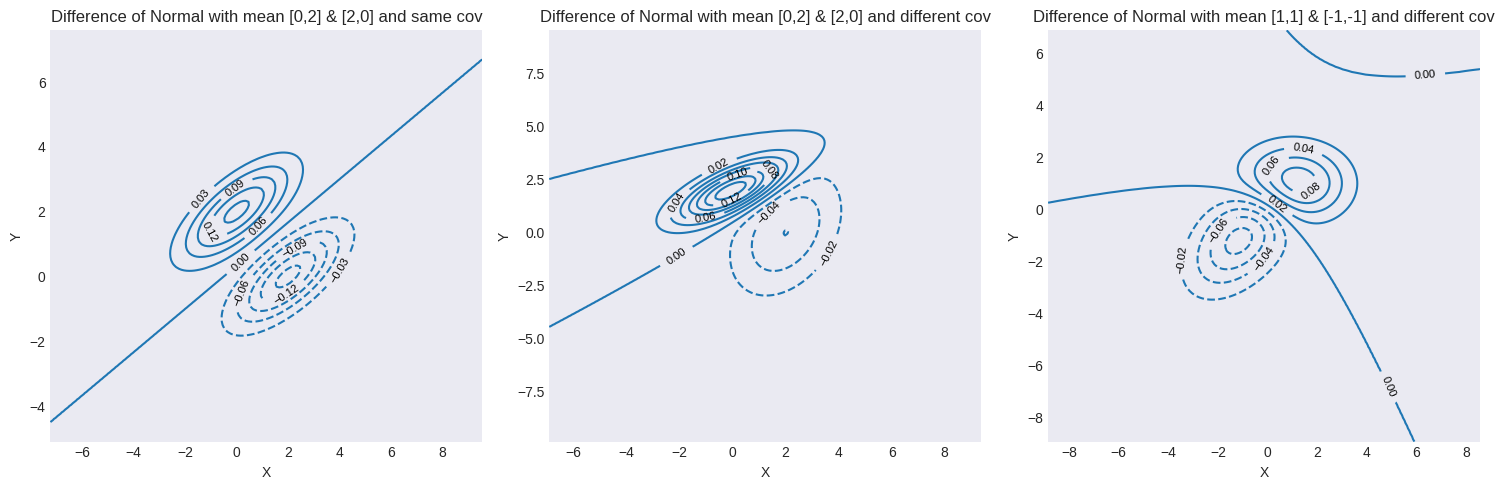

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

def plot_contour_difference(mu1, cov1, mu2, cov2, label=None, ax=None):
    if ax is None:
        ax = plt.gca()

    # Generate data points for Gaussian 1
    data_points_1 = np.random.multivariate_normal(mu1, cov1, 5000)
    x_min_1, x_max_1 = np.min(data_points_1[:, 0]), np.max(data_points_1[:, 0])
    y_min_1, y_max_1 = np.min(data_points_1[:, 1]), np.max(data_points_1[:, 1])

    # Generate data points for Gaussian 2
    data_points_2 = np.random.multivariate_normal(mu2, cov2, 5000)
    x_min_2, x_max_2 = np.min(data_points_2[:, 0]), np.max(data_points_2[:, 0])
    y_min_2, y_max_2 = np.min(data_points_2[:, 1]), np.max(data_points_2[:, 1])

    # Combine the range of data points from both distributions
    x_min = min(x_min_1, x_min_2)
    x_max = max(x_max_1, x_max_2)
    y_min = min(y_min_1, y_min_2)
    y_max = max(y_max_1, y_max_2)

    delta_x, delta_y = (x_max - x_min)/5, (y_max - y_min)/5
    x_min, x_max = x_min - delta_x, x_max + delta_x
    y_min, y_max = y_min - delta_y, y_max + delta_y

    # Generate grid points
    x, y = np.mgrid[x_min:x_max:0.1, y_min:y_max:0.1]
    pos = np.dstack((x, y))

    # Create multivariate normal distributions
    rv1 = multivariate_normal(mu1, cov1)
    rv2 = multivariate_normal(mu2, cov2)

    # Calculate the difference of PDFs
    pdf_diff = rv1.pdf(pos) - rv2.pdf(pos)

    # Plot contour of the difference of PDFs
    contours = ax.contour(x, y, pdf_diff, levels=10, label=label, colors='tab:blue')
    ax.clabel(contours, inline=True, fontsize=8, colors='black')
    ax.legend()

# Define means and covariance matrices for each pair of Gaussian distributions
means_1 = [(0, 2), (0, 2), (1, 1)]
covs_1 = [[[2, 1], [1, 1]], [[2, 1], [1, 1]], [[2, 0], [0, 1]]]

means_2 = [(2, 0), (2, 0), (-1, -1)]
covs_2 = [[[2, 1], [1, 1]], [[2, 1], [1, 4]], [[2, 1], [1, 2]]]

labels = ['Difference of Normal with mean [0,2] & [2,0] and same cov', 'Difference of Normal with mean [0,2] & [2,0] and different cov',
          'Difference of Normal with mean [1,1] & [-1,-1] and different cov']

# Create subplots for each pair of Gaussian distributions
fig, axs = plt.subplots(1, len(means_1), figsize=(15, 5))

# Plot the difference of PDFs for each pair of Gaussian distributions
for i, (mu1, cov1, mu2, cov2, label) in enumerate(zip(means_1, covs_1, means_2, covs_2, labels)):
    plot_contour_difference(mu1, cov1, mu2, cov2, label, axs[i])
    axs[i].set_xlabel('X')
    axs[i].set_ylabel('Y')
    axs[i].set_title(f'{label}')

plt.tight_layout()
plt.show()
